# Live Project

# 1.Collecting Data  2.Analyzing Data 3.Data Wrangling 4.Train andTest Data

#  5.Acuracy Check

# LogisticRegression Model Based on Machine Learning

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [35]:
df = pd.read_csv('E:\suv_data.csv')

In [36]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
df.shape

(400, 5)

# EDA

<AxesSubplot:xlabel='Purchased', ylabel='count'>

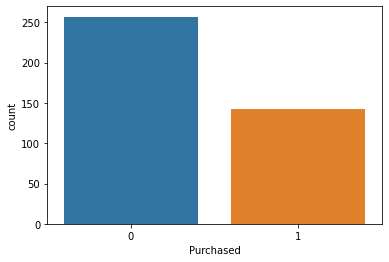

In [38]:
sns.countplot(x='Purchased',data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

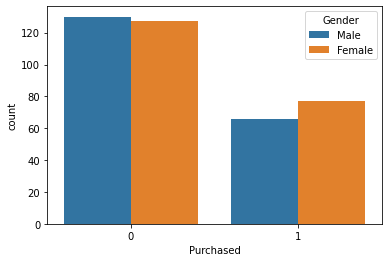

In [39]:
sns.countplot(x='Purchased',hue='Gender',data=df)

<AxesSubplot:ylabel='Frequency'>

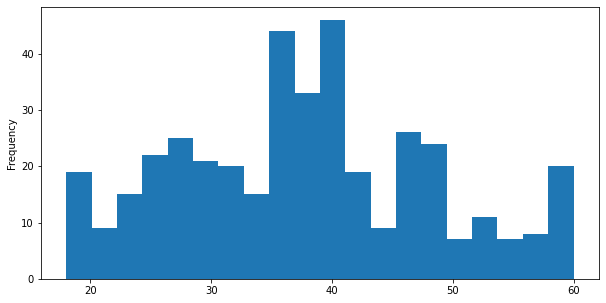

In [40]:
df['Age'].plot.hist(bins=20,figsize=(10,5))

In [41]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

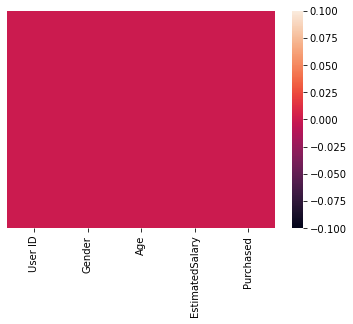

In [42]:
sns.heatmap(df.isnull(), yticklabels= False)

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

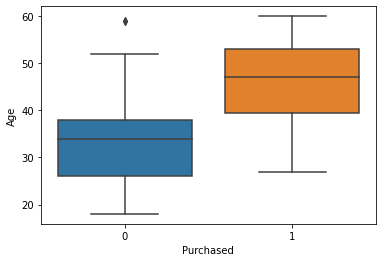

In [44]:
sns.boxplot(x='Purchased',y='Age',data =df)

In [45]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
df.drop(['User ID','EstimatedSalary'],axis=1,inplace=True)

In [47]:
df.head(5)

,Gender,Age,Purchased
0,Male,19,0
1,Male,35,0
2,Female,26,0
3,Female,27,0
4,Male,19,0


In [50]:
sex = pd.get_dummies(df['Gender'],drop_first= True)

In [51]:
sex.head(2)

,Male
0,1
1,1


In [52]:
df = pd.concat([df,sex],axis=1)

In [53]:
df.head(5)

,Gender,Age,Purchased,Male
0,Male,19,0,1
1,Male,35,0,1
2,Female,26,0,0
3,Female,27,0,0
4,Male,19,0,1


In [55]:
df.drop('Gender',axis=1,inplace = True)

# Train

In [60]:
X = df[['Age','Male']]
y = df['Purchased']

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log = LogisticRegression()

In [66]:
log.fit(X_train,y_train)

LogisticRegression()

In [67]:
predict = log.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [72]:
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.93        68\n           1       0.92      0.75      0.83        32\n\n    accuracy                           0.90       100\n   macro avg       0.91      0.86      0.88       100\nweighted avg       0.90      0.90      0.90       100\n'

In [73]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,predict)*100

90.0